In [ ]:
import yfinance as yf
import numpy as np

# --- 1. Download AAPL stock data ---
ticker = "AAPL"
start_date = "2025-04-14"
end_date = "2025-05-21"
data = yf.download(ticker, start=start_date, end=end_date)

# --- 2. Compute daily log returns ---
data["LogReturns"] = np.log(data["Close"] / data["Close"].shift(1))
log_returns = data["LogReturns"].dropna()

# --- 3. Calculate volatility ---
vol_daily = log_returns.std()
vol_period = vol_daily * np.sqrt(len(log_returns))
vol_annual = vol_daily * np.sqrt(252)

# --- 4. Calculate total return as a FLOAT using .iloc (not Series) ---
start_price = data["Close"].iloc[0]
end_price = data["Close"].iloc[-1]
# Ensure total_return is a single float value by using .item() on the result
total_return = ((end_price / start_price) - 1).item()

# --- 5. Print formatted results ---
print(f"Daily volatility (σ):            {vol_daily:.4%}")
print(f"Volatility over period:          {vol_period:.4%}")
print(f"Annualised volatility (σ·√252):  {vol_annual:.4%}")
print(f"Total return over the period:    {total_return:.2%}")

[*********************100%***********************]  1 of 1 completed

Daily volatility (σ):            2.1466%
Volatility over period:          10.7328%
Annualised volatility (σ·√252):  34.0755%
Total return over the period:    2.28%


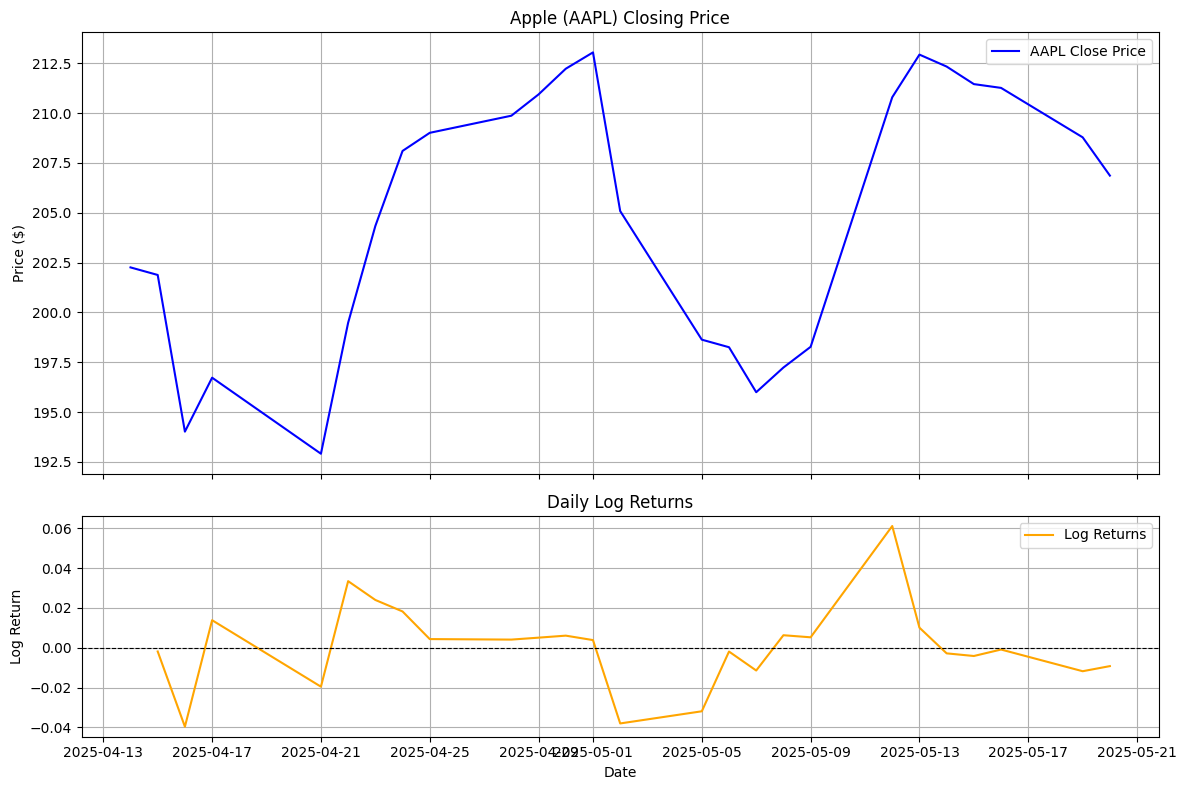

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# --- Plot 1: Closing Price ---
ax1.plot(data.index, data['Close'], label="AAPL Close Price", color='blue')
ax1.set_title("Apple (AAPL) Closing Price")
ax1.set_ylabel("Price ($)")
ax1.legend()
ax1.grid(True)

# --- Plot 2: Daily Log Returns ---
ax2.plot(log_returns.index, log_returns, label="Log Returns", color='orange')
ax2.set_title("Daily Log Returns")
ax2.set_ylabel("Log Return")
ax2.set_xlabel("Date")
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.legend()
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
tickers = ["AAPL", "TSLA", "MSFT", "XOM"]
start_date = "2025-04-14"
end_date = "2025-05-21"

for ticker in tickers:
    # Download stock data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Compute daily log returns
    data["LogReturns"] = np.log(data["Close"] / data["Close"].shift(1))
    log_returns = data["LogReturns"].dropna()

    # Calculate volatility
    vol_daily = log_returns.std()
    vol_period = vol_daily * np.sqrt(len(log_returns))
    vol_annual = vol_daily * np.sqrt(252)

    # Calculate total return as a float
    start_price = data["Close"].iloc[0]
    end_price = data["Close"].iloc[-1]
    total_return = ((end_price / start_price) - 1).item()

    # Print results
    print(f"--- {ticker} ---")
    print(f"Daily volatility (σ):            {vol_daily:.4%}")
    print(f"Volatility over period:          {vol_period:.4%}")
    print(f"Annualised volatility (σ·√252):  {vol_annual:.4%}")
    print(f"Total return over the period:    {total_return:.2%}\n")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

--- AAPL ---
Daily volatility (σ):            2.1466%
Volatility over period:          10.7328%
Annualised volatility (σ·√252):  34.0755%
Total return over the period:    2.28%

--- TSLA ---
Daily volatility (σ):            3.6823%
Volatility over period:          18.4117%
Annualised volatility (σ·√252):  58.4553%
Total return over the period:    36.25%

--- MSFT ---
Daily volatility (σ):            2.0438%
Volatility over period:          10.2192%
Annualised volatility (σ·√252):  32.4449%
Total return over the period:    18.36%

--- XOM ---
Daily volatility (σ):            1.4288%
Volatility over period:          7.1438%
Annualised volatility (σ·√252):  22.6810%
Total return over the period:    2.44%



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


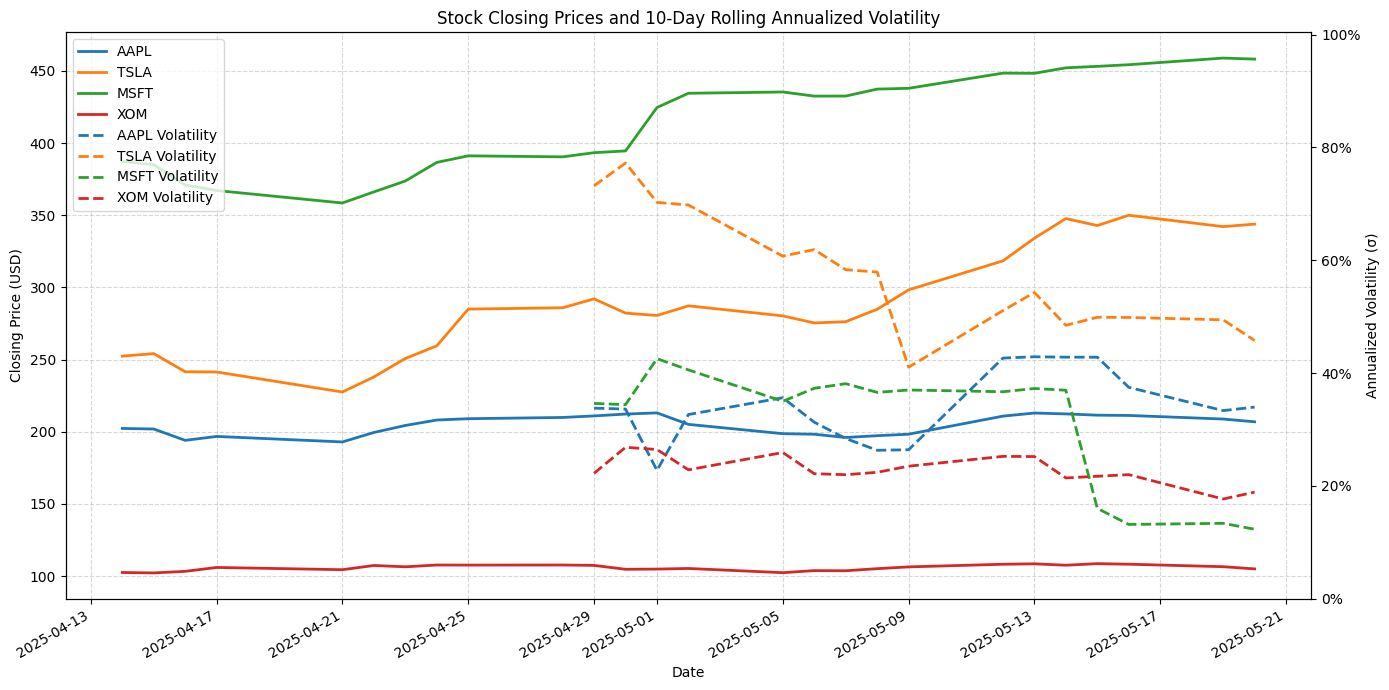

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Ensure this is imported

tickers = ["AAPL", "TSLA", "MSFT", "XOM"]
start_date = "2025-04-14"
end_date = "2025-05-21"
rolling_window = 10  # days for rolling volatility

colors = {
    "AAPL": "#1f77b4",  # blue
    "TSLA": "#ff7f0e",  # orange
    "MSFT": "#2ca02c",  # green
    "XOM": "#d62728",   # red
}

# Dictionaries to hold data
close_prices = {}
rolling_volatility = {}

# Download and calculate rolling volatility
for stock_ticker in tickers: # Renamed loop variable
    data = yf.download(stock_ticker, start=start_date, end=end_date)
    data["LogReturns"] = np.log(data["Close"] / data["Close"].shift(1))
    data["RollingVol"] = data["LogReturns"].rolling(window=rolling_window).std() * np.sqrt(252)  # annualized rolling vol

    close_prices[stock_ticker] = data["Close"]
    rolling_volatility[stock_ticker] = data["RollingVol"]

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot closing prices
for stock_ticker in tickers: # Use the new loop variable
    close_prices[stock_ticker].plot(ax=ax1, label=f"{stock_ticker} Close", color=colors[stock_ticker], linewidth=2)

ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price (USD)")
ax1.set_title(f"Stock Closing Prices and {rolling_window}-Day Rolling Annualized Volatility")
ax1.grid(True, linestyle='--', alpha=0.5)

# Second y-axis for rolling volatility
ax2 = ax1.twinx()

# Plot rolling volatility
for stock_ticker in tickers: # Use the new loop variable
    rolling_volatility[stock_ticker].plot(ax=ax2, label=f"{stock_ticker} Volatility", color=colors[stock_ticker], linestyle='--', linewidth=2)

ax2.set_ylabel("Annualized Volatility (σ)")
# Now 'ticker' correctly refers to the imported module
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax2.set_ylim(0, max(v.max() for v in rolling_volatility.values() if not v.empty) * 1.3) # Added check for empty data

# Combine legends from both axes
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# --- 1. Download AUD/JPY exchange rate data ---
ticker = "AUDJPY=X"  # AUD to JPY
start_date = "2025-04-14"
end_date = "2025-05-21"
data = yf.download(ticker, start=start_date, end=end_date)

# --- 2. Compute daily log returns ---
data["LogReturns"] = np.log(data["Close"] / data["Close"].shift(1))
log_returns = data["LogReturns"].dropna()

# --- 3. Calculate volatility ---
vol_daily = log_returns.std()
vol_period = vol_daily * np.sqrt(len(log_returns))
vol_annual = vol_daily * np.sqrt(252)

# --- 4. Calculate total return as a FLOAT using .iloc ---
start_price = data["Close"].iloc[0]
end_price = data["Close"].iloc[-1]
total_return = ((end_price / start_price) - 1).item()

# --- 5. Print formatted results ---
print(f"Daily volatility (σ):            {vol_daily:.4%}")
print(f"Volatility over period:          {vol_period:.4%}")
print(f"Annualised volatility (σ·√252):  {vol_annual:.4%}")
print(f"Total return over the period:    {total_return:.2%}")


[*********************100%***********************]  1 of 1 completed

Daily volatility (σ):            0.6575%
Volatility over period:          3.2212%
Annualised volatility (σ·√252):  10.4379%
Total return over the period:    3.37%


[*********************100%***********************]  1 of 1 completed


AttributeError: 'str' object has no attribute 'PercentFormatter'

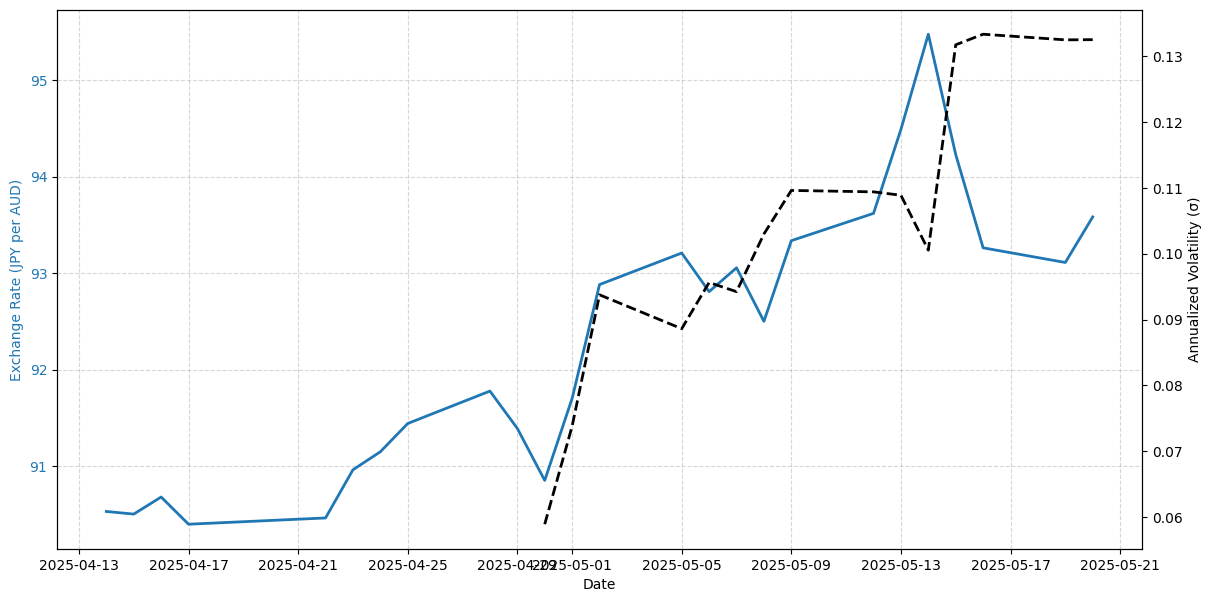

In [ ]:
# --- 1. Download AUD/JPY exchange rate data ---
ticker_symbol = "AUDJPY=X"
start_date = "2025-04-14"
end_date = "2025-05-21"
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# --- 2. Compute daily log returns ---
data["LogReturns"] = np.log(data["Close"] / data["Close"].shift(1))

# --- 3. Compute 10-day rolling annualized volatility ---
rolling_window = 10
data["RollingVol"] = data["LogReturns"].rolling(window=rolling_window).std() * np.sqrt(252)

# --- 4. Plotting ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot AUD/JPY closing price
ax1.plot(data.index, data["Close"], label="AUD/JPY Exchange Rate", color="#1f77b4", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Exchange Rate (JPY per AUD)", color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4")
ax1.grid(True, linestyle='--', alpha=0.5)

# Second y-axis for rolling volatility
ax2 = ax1.twinx()
ax2.plot(data.index, data["RollingVol"], label="Rolling Volatility (10-day)", color="black", linestyle='--', linewidth=2)
ax2.set_ylabel("Annualized Volatility (σ)", color="black")
ax2.tick_params(axis='y', labelcolor="black")
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

# Title and legends
plt.title("AUD/JPY Exchange Rate and Rolling Annualized Volatility")
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


In [ ]:
# --- Inputs ---
delta_per_option = 0.1402      # Delta per option contract (e.g., 14.02%)
position_value_usd = 30000     # Total notional position in USD
stock_price = 202.585          # Price per share of the underlying stock
shares_per_option = 100        # Each option controls 100 shares

# --- Step 1: Estimate number of option contracts held ---
# Divide position value by total value of one contract (100 shares × price per share)
num_contracts = position_value_usd / (stock_price * shares_per_option)

# --- Step 2: Calculate total delta exposure from options ---
total_delta = num_contracts * shares_per_option * delta_per_option

# --- Step 3: Determine hedge action ---
# To hedge, take the opposite position in shares
# Round to the nearest share
hedge_shares = round(total_delta)

# --- Output results ---
print(f"Estimated number of option contracts:  {num_contracts:.2f}")
print(f"Total delta exposure from options:     {total_delta:.2f} shares")
print(f"To delta hedge, you should short:      {hedge_shares} shares of the stock")


Estimated number of option contracts:  1.48
Total delta exposure from options:     20.76 shares
To delta hedge, you should short:      21 shares of the stock
